In [113]:
import numpy as np
import random
import matplotlib.pyplot as plt

from submodlib import FacilityLocationFunction, GraphCutFunction, SetCoverFunction, DisparitySumFunction
from submodlib import LogDeterminantMutualInformationFunction, ConcaveOverModularFunction

# Part 1

In [114]:
gset = []
gset_x = []
gset_y = []

rep = []
rep_x = []
rep_y = []

with open('gset_1.txt', 'r') as f:
    for line in f:
        line = line.split(',')
        gset_x.append(float(line[0]))
        gset_y.append(float(line[1]))
        gset.append([float(line[0]), float(line[1])])
        
with open('rep.txt', 'r') as f:
    for line in f:
        line = line.split(',')
        rep_x.append(float(line[0]))
        rep_y.append(float(line[1]))
        rep.append([float(line[0]), float(line[1])])

f.close()

gset = np.array(gset)
rep = np.array(rep)

n = len(gset)
n_rep = len(rep)

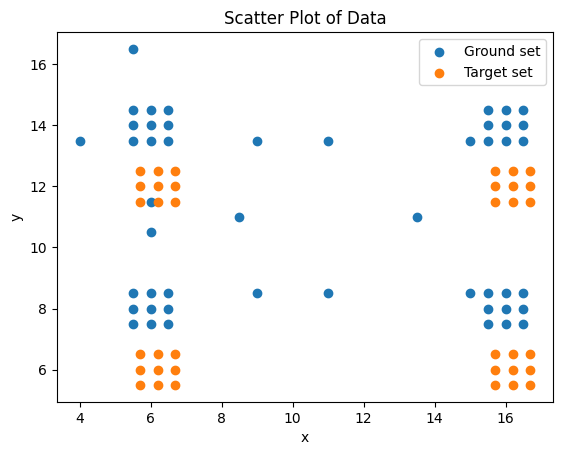

In [115]:
plt.scatter(gset_x, gset_y, label='Ground set')
plt.scatter(rep_x, rep_y, label='Target set')

plt.xlabel('x')
plt.ylabel('y')

plt.title('Scatter Plot of Data')
plt.legend()
plt.show()

## Facility Location

[(47, 7.033941428409889), (35, 5.059139810502529), (32, 3.6034038364887238), (17, 3.2280133664608), (36, 0.10896065831184387), (18, 0.10896065831184387), (33, 0.10896041989326477), (15, 0.057381629943847656), (34, 0.013332635164260864), (31, 0.013332635164260864)]


[||||||||||||||||||||]100% [Iteration 10 of 10]

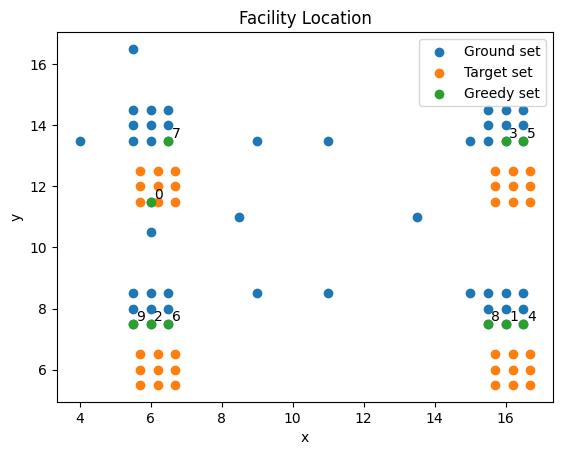

In [116]:
FL = FacilityLocationFunction(n=n, data=gset, separate_rep=True, n_rep=n_rep, data_rep=rep, mode="dense", metric="euclidean")
greedy_list = FL.maximize(budget=10, optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(greedy_list)
greedy_x = [gset_x[x[0]] for x in greedy_list]
greedy_y = [gset_y[x[0]] for x in greedy_list]

plt.scatter(gset_x, gset_y, label='Ground set')
plt.scatter(rep_x, rep_y, label='Target set')
plt.scatter(greedy_x, greedy_y, label='Greedy set')

plt.xlabel('x')
plt.ylabel('y')

plt.title('Facility Location')
plt.legend()

for label, element in enumerate(greedy_list):
    plt.annotate(label, (gset_x[element[0]], gset_y[element[0]]), (gset_x[element[0]]+0.1, gset_y[element[0]]+0.1))
    
plt.show()

## Graph Cut

[(47, 7.033941428409889), (35, 5.248506189556792), (46, 5.230022019939497), (32, 5.230022019939497), (33, 5.219324848847464), (36, 5.191547793336213), (34, 4.98342073475942), (31, 4.917666536523029), (29, 4.625462738564238), (27, 4.607349946163595)]
[(47, 6.033941428409889), (35, 4.239338019164279), (32, 3.945875562960282), (17, 3.3656900762580335), (15, 2.618706743698567), (36, 2.5117731280624866), (33, 2.257616095012054), (46, 1.6663244452793151), (18, 1.6358305903850123), (34, 0.9449111032299697)]
[(47, 2.0339414284098893), (35, 0.202665337594226), (17, -1.0755577124655247), (32, -1.2200630868319422), (15, -4.7275759489275515), (38, -5.48955153580755), (45, -7.094782793748891), (42, -7.454732849262655), (24, -9.10765720717609), (39, -9.469829984474927)]


[||||||||||||||||||||]100% [Iteration 10 of 10]

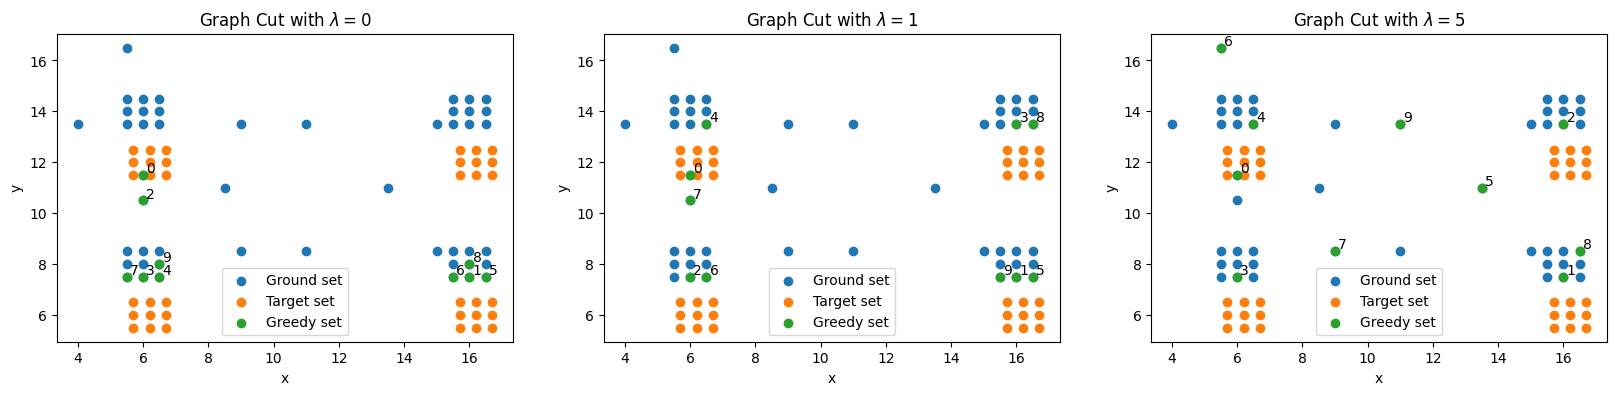

In [117]:
lambdas = [0, 1, 5]
index = 1
plt.figure(figsize = (20, 4))
for lambdaVal in lambdas:
    GC = GraphCutFunction(n=n, data=gset, separate_rep=True, n_rep=n_rep, data_rep=rep, lambdaVal=lambdaVal, mode="dense", metric="euclidean")
    greedy_list = GC.maximize(budget=10, optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
    print(greedy_list)
    greedy_x = [gset_x[x[0]] for x in greedy_list]
    greedy_y = [gset_y[x[0]] for x in greedy_list]

    plt.subplot(1, 3, index)
    plt.scatter(gset_x, gset_y, label='Ground set')
    plt.scatter(rep_x, rep_y, label='Target set')
    plt.scatter(greedy_x, greedy_y, label='Greedy set')

    plt.xlabel('x')
    plt.ylabel('y')

    plt.title('Graph Cut with $\lambda=$'+str(lambdaVal))
    plt.legend()

    for label, element in enumerate(greedy_list):
        plt.annotate(label, (gset_x[element[0]], gset_y[element[0]]), (gset_x[element[0]]+0.1, gset_y[element[0]]+0.1))

    index += 1

## Disparity Sum

[(47, 0.0), (36, 0.9963682889938354), (6, 1.9655494093894958), (45, 2.914377808570862), (40, 3.8598334789276123), (31, 4.7889745235443115), (39, 5.711325526237488), (0, 6.47794497013092), (38, 7.407852113246918), (42, 8.133478105068207)]


[||||||||||||||||||||]100% [Iteration 10 of 10]

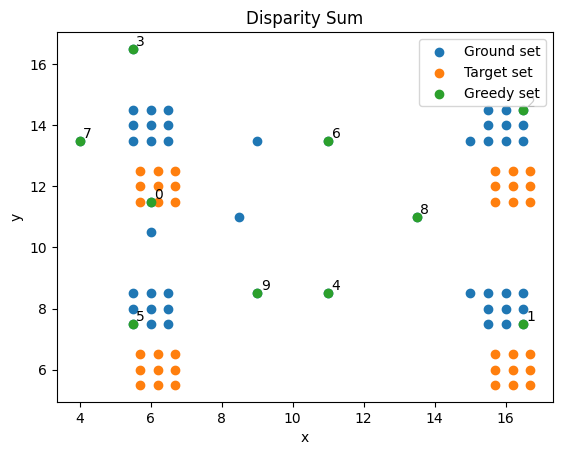

In [120]:
DS = DisparitySumFunction(n=n, data=gset, mode="dense", metric="euclidean")
greedy_list = DS.maximize(budget=10, optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(greedy_list)
greedy_x = [gset_x[x[0]] for x in greedy_list]
greedy_y = [gset_y[x[0]] for x in greedy_list]

plt.scatter(gset_x, gset_y, label='Ground set')
plt.scatter(rep_x, rep_y, label='Target set')
plt.scatter(greedy_x, greedy_y, label='Greedy set')

plt.xlabel('x')
plt.ylabel('y')

plt.title('Disparity Sum')
plt.legend()

for label, element in enumerate(greedy_list):
    plt.annotate(label, (gset_x[element[0]], gset_y[element[0]]), (gset_x[element[0]]+0.1, gset_y[element[0]]+0.1))
    
plt.show()

# Part 2

In [121]:
gset = []
gset_x = []
gset_y = []

qset = []

with open('gset_2.txt', 'r') as f:
    for line in f:
        line = line.split(',')
        gset_x.append(float(line[0]))
        gset_y.append(float(line[1]))
        gset.append([float(line[0]), float(line[1])])
        
f.close()
gset = np.array(gset)

n = len(gset)

In [128]:
q = []

with open('qset.txt', 'r') as f:
    for queries in f:
        q.append([])
        queries = queries.split('; ')[:-1]
        if (len(queries)) == 1:
            queries = queries[0].split(',')
            x = float(queries[0])
            y = float(queries[0])
            q[-1].append([x, y])
            
        else:
            for query in queries:
                query = query.split(',')
                x = float(query[0])
                y = float(query[1])
                q[-1].append([x, y])
                
qset = []
qset_x = []
qset_y = []

for _q in q:
    for __q in _q:
        qset_x.append(__q[0])
        qset_y.append(__q[1])
        qset.append(__q)

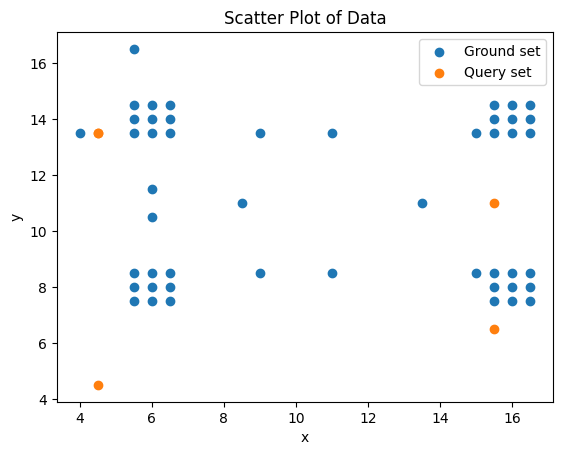

In [129]:
plt.scatter(gset_x, gset_y, label='Ground set')
plt.scatter(qset_x, qset_y, label='Query set')

plt.xlabel('x')
plt.ylabel('y')

plt.title('Scatter Plot of Data')
plt.legend()
plt.show()

## Log Determinant Mutual Information Function

[(0, 0.16444167269318333), (34, 0.09647782618637868), (13, 0.05734792971443492), (35, 0.03723281020879027), (7, 0.022821915537262538), (36, 0.0142723598260861), (1, 0.008422368224959842), (28, 0.0064008685104468555), (14, 0.004239014226842475), (47, 0.0028388801923032725)]
[(0, 0.16444213726703516), (13, 0.057353635915019074), (38, 0.03441645472891086), (7, 0.022820629901734835), (22, 0.01639285228365084), (16, 0.015649575658098325), (1, 0.008421828165415757), (24, 0.007015251346709883), (18, 0.0067629315955708424), (44, 0.0044484615729577515)]
[(31, 0.010638695608657267), (32, 0.003403535576086858), (33, 0.001440690110603715), (25, 0.0007468725751709204), (19, 0.00015297008741649298), (26, 0.00010704569739750092), (27, 5.882513125238242e-05), (42, 4.042931951875328e-05), (40, 9.177356838474537e-06), (20, 1.2506420624114334e-06)]


[||||||||||||||||||||]100% [Iteration 10 of 10]

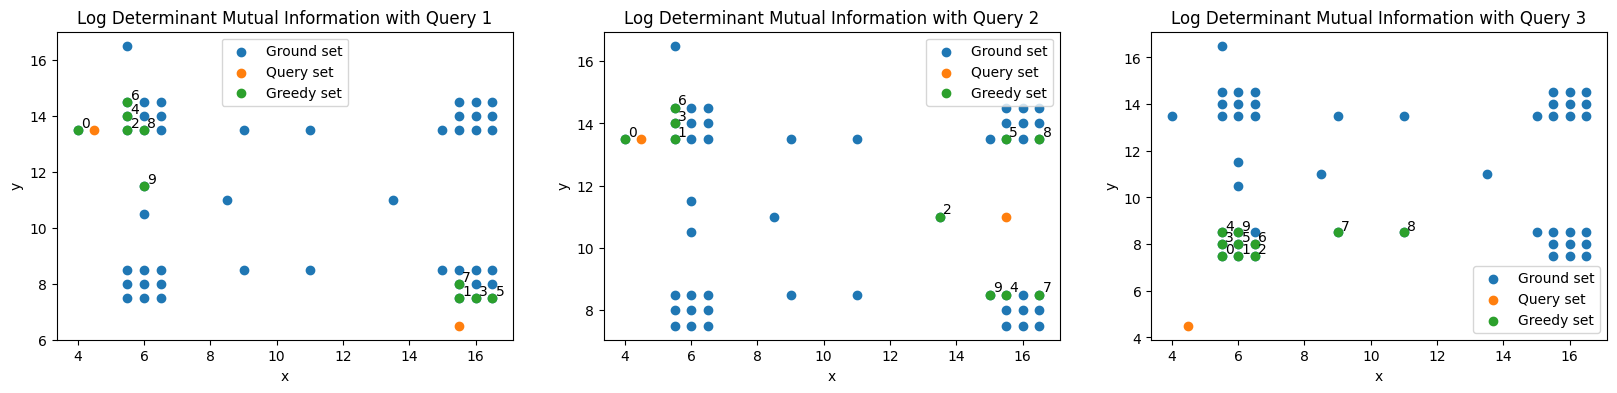

In [135]:
plt.figure(figsize = (20, 4))
index = 1
for i, _q in enumerate(q):
    qset_x = []
    qset_y = []
    
    _q = np.array(_q)
    for __q in _q:
        qset_x.append(__q[0])
        qset_y.append(__q[1])
    
    num_queries = len(_q)
    
    plt.subplot(1, 3, index)
    ldmi = LogDeterminantMutualInformationFunction(n=n, num_queries=num_queries, data=gset, queryData=_q, metric="euclidean", lambdaVal=1)
    greedy_list = ldmi.maximize(budget=10, optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
    print(greedy_list)
    greedy_x = [gset_x[x[0]] for x in greedy_list]
    greedy_y = [gset_y[x[0]] for x in greedy_list]
    
    plt.scatter(gset_x, gset_y, label="Ground set")
    plt.scatter(qset_x, qset_y, label="Query set")
    plt.scatter(greedy_x, greedy_y, label="Greedy set")
    
    plt.xlabel('x')
    plt.ylabel('y')

    plt.title('Log Determinant Mutual Information with Query '+str(i+1))
    plt.legend()
    
    for label, element in enumerate(greedy_list):
        plt.annotate(label, (gset_x[element[0]], gset_y[element[0]]), (gset_x[element[0]]+0.1, gset_y[element[0]]+0.1))
    index += 1

## Concave over Modular

[(0, 1.1537412636704727), (34, 0.9499556899076484), (13, 0.7699841440158339), (35, 0.7577209755714414), (7, 0.6689091079333034), (36, 0.6056561889785126), (1, 0.5565505635763586), (28, 0.5513649789301582), (14, 0.5176770069947234), (29, 0.510028450424941)]
[(0, 1.1562209648047936), (13, 0.7768094852635088), (7, 0.6758548056753566), (38, 0.6328010199066096), (1, 0.561557411808282), (14, 0.5251388114652473), (8, 0.49283606117724155), (16, 0.4420876921746457), (2, 0.43745397651930906), (22, 0.41053810669930435)]
[(31, 0.37418806815338523), (32, 0.31549063070727584), (33, 0.2644508072873616), (25, 0.2491245968082899), (26, 0.22196504008411366), (27, 0.19396851210036414), (19, 0.1814199913917256), (20, 0.1656539470771472), (21, 0.1480088023060423), (42, 0.0688116602468587)]


[||||||||||||||||||||]100% [Iteration 10 of 10]

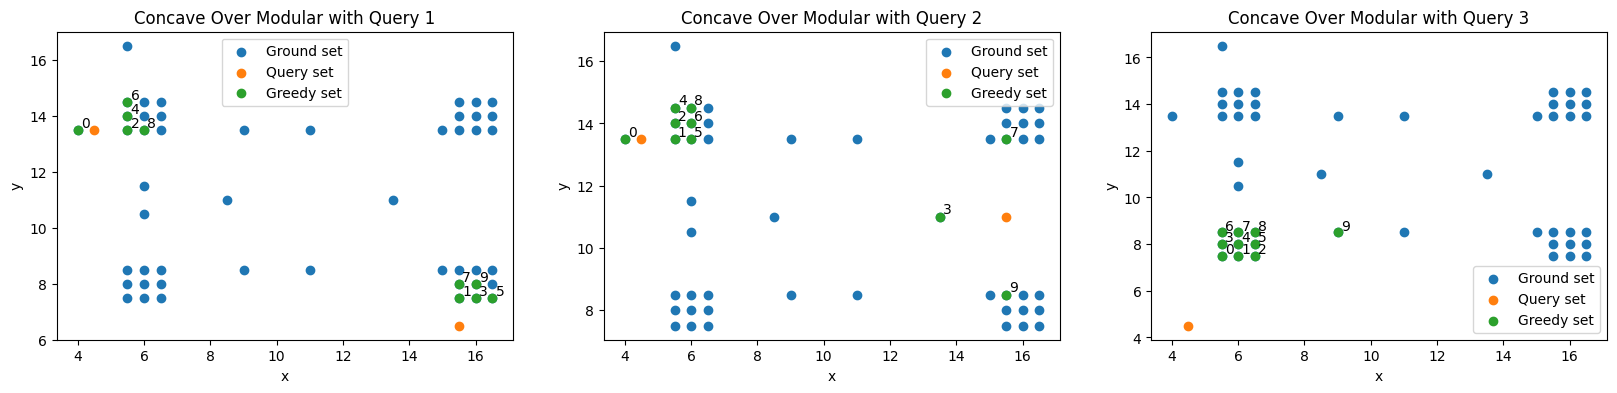

In [138]:
plt.figure(figsize = (20, 4))
index = 1
for i, _q in enumerate(q):
    qset_x = []
    qset_y = []
    
    _q = np.array(_q)
    for __q in _q:
        qset_x.append(__q[0])
        qset_y.append(__q[1])
    
    num_queries = len(_q)
    
    plt.subplot(1, 3, index)
    com = ConcaveOverModularFunction(n=n, num_queries=num_queries, data=gset, queryData=_q, metric="euclidean")
    greedy_list = com.maximize(budget=10, optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
    print(greedy_list)
    greedy_x = [gset_x[x[0]] for x in greedy_list]
    greedy_y = [gset_y[x[0]] for x in greedy_list]
    
    plt.scatter(gset_x, gset_y, label="Ground set")
    plt.scatter(qset_x, qset_y, label="Query set")
    plt.scatter(greedy_x, greedy_y, label="Greedy set")
    
    plt.xlabel('x')
    plt.ylabel('y')

    plt.title('Concave Over Modular with Query '+str(i+1))
    plt.legend()
    
    for label, element in enumerate(greedy_list):
        plt.annotate(label, (gset_x[element[0]], gset_y[element[0]]), (gset_x[element[0]]+0.1, gset_y[element[0]]+0.1))
    index += 1